In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 数据集

from sklearn  import datasets

dataset = datasets.make_moons(noise=0.15, random_state=666)

X = dataset[0]
y = dataset[1]

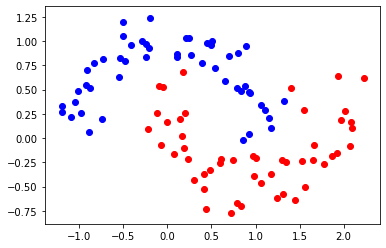

In [3]:
plt.scatter(X[y==1,0], X[y==1, 1], color="red")
plt.scatter(X[y==0, 0], X[y==0, 1], color="blue")
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ("stand", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])

In [6]:
svc = RBFKernelSVC(gamma=1.0)

svc.fit(X, y)

Pipeline(steps=[('stand', StandardScaler()), ('svc', SVC(gamma=1.0))])

In [7]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape((-1, 1)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape((-1, 1))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap= custom_cmap)

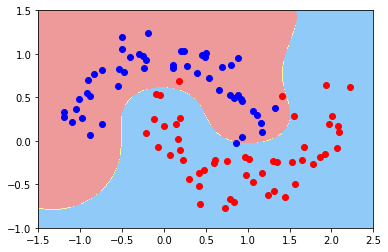

In [8]:
plot_decision_boundary(svc, [-1.5, 2.5, -1, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color="blue")
plt.scatter(X[y==1, 0], X[y==1, 1], color="red")
plt.show()

In [9]:
svc_100 = RBFKernelSVC(gamma=100.0)
svc_100.fit(X, y)

Pipeline(steps=[('stand', StandardScaler()), ('svc', SVC(gamma=100.0))])

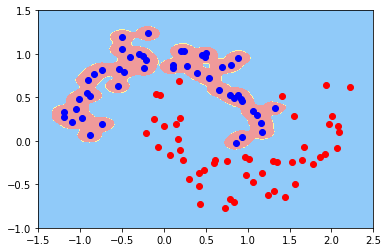

In [10]:
plot_decision_boundary(svc_100, [-1.5, 2.5, -1, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color="blue")
plt.scatter(X[y==1, 0], X[y==1, 1], color="red")
plt.show()